# Near-horizon geometry of the extremal Reissner-Nordström black hole

This notebook derives the near-horizon geometry of the extremal (i.e. maximally charged) Reissner-Nordström black hole. It is based on SageMath tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr/).

In [1]:
sage.version.banner

'SageMath version 10.8.beta9, Release Date: 2025-11-11'

In [2]:
%display latex

## Spacetime manifold and metric

We declare $\mathcal{M}$ as a 4-dimensional Lorentzian manifold and endow it with the **Boyer-Lindquist chart** (`BL`):



In [3]:
M = Manifold(4, 'M', latex_name=r'\mathcal{M}', structure='Lorentzian')
BL.<t,r,th,ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi")
BL

Chart (M, (t, r, th, ph))

In [4]:
BL.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

Initialization of the metric:

In [5]:
m = var('m', domain='real')
assume(m>0)
Q2 = m^2 # extremal Reissner-Nordström
g = M.metric()
g[0,0] = - (1 - 2*m/r + Q2/r^2)
g[1,1] = -1/g[0,0]
g[2,2], g[3,3] = r^2, r^2*sin(th)^2
g.display()

g = (-m^2/r^2 + 2*m/r - 1) dt⊗dt + r^2/(m^2 - 2*m*r + r^2) dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [6]:
g.apply_map(factor)
g.display()

g = -(m - r)^2/r^2 dt⊗dt + r^2/(m - r)^2 dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

## Curvature

In [7]:
Riem = g.riemann()
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -(3*m^2 - 2*m*r)/(m^2*r^2 - 2*m*r^3 + r^4) 
Riem(g)^t_th,t,th = (m^2 - m*r)/r^2 
Riem(g)^t_ph,t,ph = (m^2 - m*r)*sin(th)^2/r^2 
Riem(g)^r_t,t,r = -(3*m^4 - 8*m^3*r + 7*m^2*r^2 - 2*m*r^3)/r^6 
Riem(g)^r_th,r,th = (m^2 - m*r)/r^2 
Riem(g)^r_ph,r,ph = (m^2 - m*r)*sin(th)^2/r^2 
Riem(g)^th_t,t,th = (m^4 - 3*m^3*r + 3*m^2*r^2 - m*r^3)/r^6 
Riem(g)^th_r,r,th = -m/(m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = -(m^2 - 2*m*r)*sin(th)^2/r^2 
Riem(g)^ph_t,t,ph = (m^4 - 3*m^3*r + 3*m^2*r^2 - m*r^3)/r^6 
Riem(g)^ph_r,r,ph = -m/(m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = (m^2 - 2*m*r)/r^2

In [8]:
g.ricci().display()

Ric(g) = (m^4 - 2*m^3*r + m^2*r^2)/r^6 dt⊗dt - m^2/(m^2*r^2 - 2*m*r^3 + r^4) dr⊗dr + m^2/r^2 dth⊗dth + m^2*sin(th)^2/r^2 dph⊗dph

The Kretschmann scalar $K := R_{abcd} R^{abcd}$:

In [9]:
K = Riem.down(g)['_{abcd}']*Riem.up(g)['^{abcd}']
K.display()

M → ℝ
(t, r, th, ph) ↦ 8*(7*m^4 - 12*m^3*r + 6*m^2*r^2)/r^8

In [10]:
K.expr().factor()

8*(7*m^2 - 12*m*r + 6*r^2)*m^2/r^8

The Ricci scalar $g^{ab} R_{ab}$:

In [11]:
g.ricci_scalar().display()

r(g): M → ℝ
   (t, r, th, ph) ↦ 0

## Eddington-Finkelstein coordinates

Let us introduce the **tortoise coordinate** $r_*$:

In [12]:
rstar(r) = r - m^2/(r - m) + 2*m*ln(abs(r - m)/m) - m 
rstar(r)

2*m*log(abs(-m + r)/m) - m + m^2/(m - r) + r

Note that the additive constant is chosen so that $r_* = 0$ for $r=2m$:

In [13]:
rstar(2*m)

0

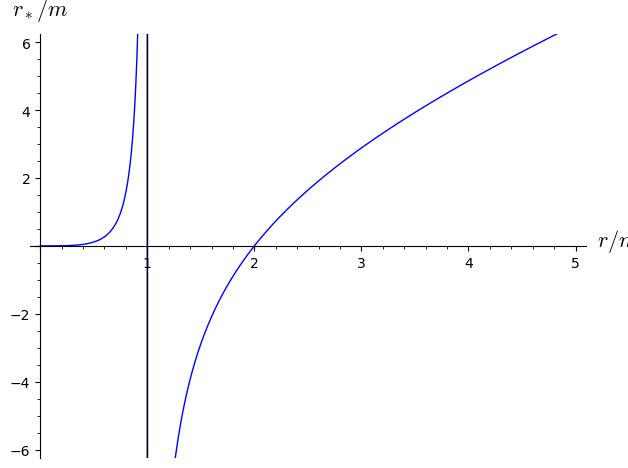

In [14]:
pl = plot(rstar(r).subs({m: 1}), (r, 0, 5), 
          axes_labels=[r'$r/m$', r'$r_*/m$']) \
     + line([(1, -10), (1, 10)], color='black')
show(pl, ymin=-6, ymax=6)

The chart of the **ingoing null Eddington-Finkelstein coordinates** $(v,r,\theta,\phi)$:

In [15]:
EF.<v,r,th,ph> = M.chart(r"v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi")
EF

Chart (M, (v, r, th, ph))

In [16]:
BL_to_EF = BL.transition_map(EF, [t + rstar(r), r, th, ph])
BL_to_EF.display()

v = 2*m*log(abs(-m + r)/m) - m + m^2/(m - r) + r + t
r = r
th = th
ph = ph

In [17]:
BL_to_EF.inverse().display()

t = (2*m^2*log(m) - 2*(m*log(m) + m)*r + r^2 + (m - r)*v - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
r = r
th = th
ph = ph

In [18]:
BL_to_EF.jacobian()

[                      1 r^2/(m^2 - 2*m*r + r^2)                       0                       0]
[                      0                       1                       0                       0]
[                      0                       0                       1                       0]
[                      0                       0                       0                       1]

In [19]:
g.display(EF)

g = -(m^2 - 2*m*r + r^2)/r^2 dv⊗dv + dv⊗dr + dr⊗dv + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

## Orthonormal tetrad associated to Eddington-Finkelstein coordinates:

In [20]:
F(r) = (r - m)^2/r^2

In [21]:
EFf = EF.frame()
E = M.vector_frame('E', [EFf[0]/sqrt(F(r)),
                         EFf[0]/sqrt(F(r)) + sqrt(F(r))*EFf[1],
                         EFf[2]/r,
                         EFf[3]/(r*sin(th))])
for v in E:
    show(v.display(EF))

E_0 = r/abs(m - r) ∂/∂v

E_1 = r/abs(m - r) ∂/∂v + abs(m - r)/r ∂/∂r

E_2 = 1/r ∂/∂th

E_3 = 1/(r*sin(th)) ∂/∂ph

Let us check that $E$ is an orthonormal frame:

In [22]:
g.display(E)

g = -E^0⊗E^0 + E^1⊗E^1 + E^2⊗E^2 + E^3⊗E^3

The dual tetrad:

In [23]:
for f in E.dual_basis():
    show(f.display(EF))

E^0 = abs(-m + r)/r dv - r/abs(-m + r) dr

E^1 = r/abs(-m + r) dr

E^2 = r dth

E^3 = r*sin(th) dph

At this stage, two charts and three vector frames have been defined on $\mathcal{M}$:

In [24]:
M.atlas()

[Chart (M, (t, r, th, ph)), Chart (M, (v, r, th, ph))]

In [25]:
M.frames()

[Coordinate frame (M, (∂/∂t,∂/∂r,∂/∂th,∂/∂ph)),
 Coordinate frame (M, (∂/∂v,∂/∂r,∂/∂th,∂/∂ph)),
 Vector frame (M, (E_0,E_1,E_2,E_3))]

### Connection 1-forms with respect to the tetrad $E$:

In [26]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [27]:
s = r'(\omega^i_j)=\left(\begin{array}{cccc}'
for i in M.irange():
    for j in M.irange():
        s += r'&' + latex(nabla.connection_form(i, j, E).display(E, EF)) 
    s += r'\\'
s += r'\end{array}\right)'
s

(\omega^i_j)=\left(\begin{array}{cccc} & \omega^0_{\ \, 0} = 0 & \omega^0_{\ \, 1} = \left( -\frac{m^{2} - m r}{r^{2} {\left| -m + r \right|}} \right) E^{0} & \omega^0_{\ \, 2} = 0 & \omega^0_{\ \, 3} = 0 \\ & \omega^1_{\ \, 0} = \left( -\frac{m^{2} - m r}{r^{2} {\left| -m + r \right|}} \right) E^{0} & \omega^1_{\ \, 1} = 0 & \omega^1_{\ \, 2} = \left( -\frac{m^{2} - 2 \, m r + r^{2}}{r^{2} {\left| -m + r \right|}} \right) E^{2} & \omega^1_{\ \, 3} = \left( -\frac{m^{2} - 2 \, m r + r^{2}}{r^{2} {\left| -m + r \right|}} \right) E^{3} \\ & \omega^2_{\ \, 0} = 0 & \omega^2_{\ \, 1} = \left( \frac{{\left| -m + r \right|}}{r^{2}} \right) E^{2} & \omega^2_{\ \, 2} = 0 & \omega^2_{\ \, 3} = -\frac{\cos\left({\theta}\right)}{r \sin\left({\theta}\right)} E^{3} \\ & \omega^3_{\ \, 0} = 0 & \omega^3_{\ \, 1} = \left( \frac{{\left| -m + r \right|}}{r^{2}} \right) E^{3} & \omega^3_{\ \, 2} = \frac{\cos\left({\theta}\right)}{r \sin\left({\theta}\right)} E^{3} & \omega^3_{\ \, 3} = 0 \\ \end{array}\right)

### Connection 1-forms with respect to the natural frame associated with Eddington-Finkelstein coordinates:

In [28]:
s = r'(\omega^i_j)=\left(\begin{array}{cccc}'
for i in M.irange():
    for j in M.irange():
        s += r'&' + latex(nabla.connection_form(i, j, EF.frame()).display(EF)) 
    s += r'\\'
s += r'\end{array}\right)'
s

(\omega^i_j)=\left(\begin{array}{cccc} & \omega^0_{\ \, 0} = \left( -\frac{m^{2} - m r}{r^{3}} \right) \mathrm{d} v & \omega^0_{\ \, 1} = 0 & \omega^0_{\ \, 2} = -r \mathrm{d} {\theta} & \omega^0_{\ \, 3} = -r \sin\left({\theta}\right)^{2} \mathrm{d} {\phi} \\ & \omega^1_{\ \, 0} = \left( -\frac{m^{4} - 3 \, m^{3} r + 3 \, m^{2} r^{2} - m r^{3}}{r^{5}} \right) \mathrm{d} v + \left( \frac{m^{2} - m r}{r^{3}} \right) \mathrm{d} r & \omega^1_{\ \, 1} = \left( \frac{m^{2} - m r}{r^{3}} \right) \mathrm{d} v & \omega^1_{\ \, 2} = \left( -\frac{m^{2} - 2 \, m r + r^{2}}{r} \right) \mathrm{d} {\theta} & \omega^1_{\ \, 3} = -\frac{{\left(m^{2} - 2 \, m r + r^{2}\right)} \sin\left({\theta}\right)^{2}}{r} \mathrm{d} {\phi} \\ & \omega^2_{\ \, 0} = 0 & \omega^2_{\ \, 1} = \frac{1}{r} \mathrm{d} {\theta} & \omega^2_{\ \, 2} = \frac{1}{r} \mathrm{d} r & \omega^2_{\ \, 3} = -\cos\left({\theta}\right) \sin\left({\theta}\right) \mathrm{d} {\phi} \\ & \omega^3_{\ \, 0} = 0 & \omega^3_{\ \, 1} = \frac{1}{r} \mathrm{d} {\phi} & \omega^3_{\ \, 2} = \frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \mathrm{d} {\phi} & \omega^3_{\ \, 3} = \frac{1}{r} \mathrm{d} r + \frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \mathrm{d} {\theta} \\ \end{array}\right)

## Near-horizon coordinates

The **near-horizon coordinates** $(T, R, \theta, \phi)$ are related to the Boyer-Lindquist coordinates by
$$T = \epsilon \frac{t}{m}, \quad R = \frac{r-m}{\epsilon m}$$
where $\epsilon$ is a constant parameter.
The event horizon of the extremal Reissner-Nordström black hole is located at $r=m$, which corresponds to $R=0$.

In [29]:
NH.<T,R,th,ph> = M.chart(r"T R th:(0,pi):\theta ph:(0,2*pi):periodic:\phi")
NH

Chart (M, (T, R, th, ph))

In [30]:
eps = var('eps', latex_name=r'\epsilon')
BL_to_NH = BL.transition_map(NH, [eps*t/m, (r-m)/(eps*m), th, ph])
BL_to_NH.display()

T = eps*t/m
R = -(m - r)/(eps*m)
th = th
ph = ph

In [31]:
BL_to_NH.inverse().display()

t = T*m/eps
r = (R*eps + 1)*m
th = th
ph = ph

In [32]:
BL_to_NH.jacobian()

[    eps/m         0         0         0]
[        0 1/(eps*m)         0         0]
[        0         0         1         0]
[        0         0         0         1]

In [33]:
BL_to_NH.jacobian_det()

m^(-2)

In [34]:
g.display(NH)

g = -R^2*m^2/(R^2*eps^2 + 2*R*eps + 1) dT⊗dT + (R^2*eps^2 + 2*R*eps + 1)*m^2/R^2 dR⊗dR + (R^2*eps^2 + 2*R*eps + 1)*m^2 dth⊗dth + (R^2*eps^2 + 2*R*eps + 1)*m^2*sin(th)^2 dph⊗dph

From now on, we set the near-horizon coordinates to be the default ones on $\mathcal{M}$:

In [35]:
M.set_default_chart(NH)
M.set_default_frame(NH.frame())

Hence `NH` becomes the default argument of `display()`:

In [36]:
g.display()

g = -R^2*m^2/(R^2*eps^2 + 2*R*eps + 1) dT⊗dT + (R^2*eps^2 + 2*R*eps + 1)*m^2/R^2 dR⊗dR + (R^2*eps^2 + 2*R*eps + 1)*m^2 dth⊗dth + (R^2*eps^2 + 2*R*eps + 1)*m^2*sin(th)^2 dph⊗dph

## The near-horizon metric $h$ as the limit $\epsilon\to 0$ of $g$

Let us define the **near-horizon metric** as the metric $h$ on $\mathcal{M}$ that is the limit $\epsilon\to 0$ of the Reissner-Nordström metric $g$. The limit is taken by asking for a series expansion of $g$ with respect to $\epsilon$ up to the 0-th order (i.e. keeping only $\epsilon^0$ terms). This is achieved via the method `truncate`:

In [37]:
g0 = g.truncate(eps, 0)

We declare $h$ and initialize its `NH` components by writing simply `h[:] = g0[:]`, since `NH` is the default chart and `NH.frame()` the default vector frame:

In [38]:
h = M.lorentzian_metric('h')
h[:] = g0[:] 
h.display()

h = -R^2*m^2 dT⊗dT + m^2/R^2 dR⊗dR + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

Up to a global factor $m^2$, we recognize the **Bertotti-Robinson metric**, i.e. the product metric of 
$\mathrm{AdS}_2\times\mathbb{S}^2$, with $(T,R)$ being **Poincaré coordinates** on $\mathrm{AdS}_2$ and $(\theta,\phi)$ the standard coordinates on $\mathbb{S}^2$ endowed with the standard (round) metric.

The components of $h$ with respect to Boyer-Lindquist coordinates are:

In [39]:
h.display(BL)

h = -(m^2 - 2*m*r + r^2)/m^2 dt⊗dt + m^2/(m^2 - 2*m*r + r^2) dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

In [40]:
h.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
h.display(BL)

h = -(m - r)^2/m^2 dt⊗dt + m^2/(m - r)^2 dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

while those with respect to Eddington-Finkelstein coordinates are:

In [41]:
h.display(EF)

h = -(m^2 - 2*m*r + r^2)/m^2 dv⊗dv + r^2/m^2 dv⊗dr + r^2/m^2 dr⊗dv + (m^3 + m^2*r + m*r^2 + r^3)/(m^3 - m^2*r) dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

In [42]:
h.apply_map(factor, frame=EF.frame(), chart=EF, keep_other_components=True)
h.display(EF)

h = -(m - r)^2/m^2 dv⊗dv + r^2/m^2 dv⊗dr + r^2/m^2 dr⊗dv + (m^2 + r^2)*(m + r)/((m - r)*m^2) dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

Note that these components are singular at $r=m$, contrary to those of $g$. 

### Curvature tensors of $h$

In [43]:
h.ricci().display()

Ric(h) = R^2 dT⊗dT - 1/R^2 dR⊗dR + dth⊗dth + sin(th)^2 dph⊗dph

In [44]:
h.ricci_scalar().display()

r(h): M → ℝ
   (t, r, th, ph) ↦ 0
   (v, r, th, ph) ↦ 0
   (T, R, th, ph) ↦ 0

In [45]:
h.riemann().display_comp(only_nonredundant=True)

Riem(h)^T_R,T,R = -1/R^2 
Riem(h)^R_T,T,R = -R^2 
Riem(h)^th_ph,th,ph = sin(th)^2 
Riem(h)^ph_th,th,ph = -1

In [46]:
h.weyl().display()

C(h) = 0

## Killing vectors of the near-horizon geometry

Two obvious Killing vectors of $h$ are $\eta := \frac{\partial}{\partial\phi}$
and $\xi_1 :=  \frac{\partial}{\partial T}$:

In [47]:
eta = M.vector_field(0, 0, 0, 1, name='eta', latex_name=r'\eta')
eta.display()

eta = ∂/∂ph

In [48]:
h.lie_derivative(eta).display()

0

In [49]:
xi1 = M.vector_field(1, 0, 0, 0, name='xi1', latex_name=r'\xi_{1}')
xi1.display()

xi1 = ∂/∂T

In [50]:
h.lie_derivative(xi1).display()

0

In [51]:
xi1.display(BL)

xi1 = m/eps ∂/∂t

In [52]:
xi1.display(EF)

xi1 = m/eps ∂/∂v

The above two Killing vectors correspond respectively to the **axisymmetry** and the **staticity** of the Reissner-Nordström metric. A third symmetry, which is not present in the original Reissner-Nordström metric, is the invariance under the **squeeze mapping** (also called **hyperbolic rotation**) $(T,R)\mapsto (\alpha T, R/\alpha)$ for any $\alpha>0$, as it is clear on the metric components of $h$ in NH coordinates. The corresponding Killing vector is 

In [53]:
xi2 = M.vector_field(T, -R, 0, 0, name='xi2', latex_name=r'\xi_{2}')
xi2.display()

xi2 = T ∂/∂T - R ∂/∂R

In [54]:
h.lie_derivative(xi2).display()

0

In [55]:
xi2.display(BL)

xi2 = t ∂/∂t + (m - r) ∂/∂r

In [56]:
xi2.display(EF)

xi2 = (2*m*log(m) - 2*m*log(abs(-m + r)) - 2*r + v) ∂/∂v + (m - r) ∂/∂r

We note that, contrary to those of $\xi_1$, the components of $\xi_2$ with respect to Boyer-Lindquist coordinates are independent from $\epsilon$. Moreover the components of $\xi_2$ with respect to Eddington-Finkelstein coordinates are singular at $r=m$.

Finally, a fourth Killing vector is

In [57]:
xi3 = M.vector_field((T^2 + 1/R^2)/2, -R*T, 0, 0,
                     name='xi3', latex_name=r'\xi_{3}')
xi3.display()

xi3 = (1/2*T^2 + 1/2/R^2) ∂/∂T - R*T ∂/∂R

In [58]:
h.lie_derivative(xi3).display()

0

We shall see below that this Killing vector is actually related to the Killing vector $\frac{\partial}{\partial \tau}$ associated to the so-called *global NH coordinates* by 
$$ \xi_3 = \frac{\partial}{\partial \tau} - \frac{1}{2} \frac{\partial}{\partial T}$$

In [59]:
xi3.display(BL)

xi3 = 1/2*(eps*m^4 + (eps*m^2 - 2*eps*m*r + eps*r^2)*t^2)/(m^3 - 2*m^2*r + m*r^2) ∂/∂t + (eps*m - eps*r)*t/m ∂/∂r

In [60]:
xi3.display(EF)

xi3 = 1/2*(4*eps*m^3*log(m)^2 + eps*m^3 - 3*eps*r^3 + (8*eps*m*log(m) + 5*eps*m)*r^2 + (eps*m - eps*r)*v^2 + 4*(eps*m^3 - eps*m^2*r)*log(abs(-m + r))^2 - (4*eps*m^2*log(m)^2 + 8*eps*m^2*log(m) - eps*m^2)*r + 4*(eps*m^2*log(m) + eps*r^2 - (eps*m*log(m) + eps*m)*r - (eps*m^2 - eps*m*r)*log(abs(-m + r)))*v - 8*(eps*m^3*log(m) + eps*m*r^2 - (eps*m^2*log(m) + eps*m^2)*r)*log(abs(-m + r)))/(m^2 - m*r) ∂/∂v + (2*eps*m^2*log(m) + eps*r^2 - 2*(eps*m*log(m) + eps*m)*r + (eps*m - eps*r)*v - 2*(eps*m^2 - eps*m*r)*log(abs(-m + r)))/m ∂/∂r

### Symmetry group

Since $h$ is the product metric of $\mathrm{AdS}_2\times\mathbb{S}^2$,
the group of isometries w.r.t. $h$ is the 6-dimensional group 
$$ G = \mathrm{SL}(2,\mathbb{R})\times \mathrm{SO}(3).$$
Let us check explicitely that the Killing vectors $\xi_1$, $\xi_2$ and $\xi_3$ generate $\mathrm{SL}(2, \mathbb{R})$. We have

In [61]:
xi1.bracket(xi2).display()

[xi1,xi2] = ∂/∂T

In [62]:
xi1.bracket(xi3).display()

[xi1,xi3] = T ∂/∂T - R ∂/∂R

In [63]:
xi2.bracket(xi3).display()

[xi2,xi3] = 1/2*(R^2*T^2 + 1)/R^2 ∂/∂T - R*T ∂/∂R

Hence

In [64]:
all([xi1.bracket(xi2) == xi1,
     xi1.bracket(xi3) == xi2,
     xi2.bracket(xi3) == xi3])

True

To recognize a the Lie algebra of $\mathrm{SL}(2,\mathbb{R})$ , let us perform a slight change of basis:

In [65]:
vE = -sqrt(2)*xi3
vF = sqrt(2)*xi1
vH = 2*xi2

This yields

In [66]:
all([vE.bracket(vF) == vH,
     vH.bracket(vE) == 2*vE,
     vH.bracket(vF) == -2*vF])

True

These are exactly the commutation relations of the standard basis of $\mathfrak{sl}(2, \mathbb{R})$. 
Indeed, we have, using the representation of $\mathfrak{sl}(2, \mathbb{R})$ by traceless $2\times 2$ matrices:

In [67]:
sl2 = lie_algebras.sl(QQ, 2, representation='matrix')  # QQ instead of RR to deal with an exact field
EE,FF,HH = sl2.gens()
EE,FF,HH

(
[0 1]  [0 0]  [ 1  0]
[0 0], [1 0], [ 0 -1]
)

In [68]:
all([EE.bracket(FF) == HH,
     HH.bracket(EE) == 2*EE,
     HH.bracket(FF) == -2*FF])

True

## Global near-horizon coordinates

Let us introduce the (compactified) **global near-horizon coordinates** $(\tau, \chi, \theta,\phi)$, which are related to the NH coordinates $(T,R,\theta,\phi)$ exactly as the *conformal coordinates* $(\tau,\chi)$ are related to the *Poincaré coordinates* $(T,R)$ in $\mathrm{AdS}_2$:

In [69]:
GNH.<ta, ch, th, ps> = M.chart(r"ta:\tau ch:(-pi/2,pi/2):\chi th:(0,pi):\theta ph:(0,2*pi):periodic:\phi")
GNH

Chart (M, (ta, ch, th, ph))

In [70]:
GNH.coord_range()

ta: (-oo, +oo); ch: (-1/2*pi, 1/2*pi); th: (0, pi); ph: [0, 2*pi] (periodic)

In [71]:
GNH_to_NH = GNH.transition_map(NH, [sin(ta)/(cos(ta) + sin(ch)),
                                    (cos(ta) + sin(ch))/cos(ch), th, ph])
GNH_to_NH.display()

T = sin(ta)/(cos(ta) + sin(ch))
R = (cos(ta) + sin(ch))/cos(ch)
th = th
ph = ph

In [72]:
GNH_to_NH.set_inverse(atan2(2*R^2*T, R^2*(1 - T^2) +1) + pi*unit_step(-R),
                      atan((R^2*(1 + T^2) - 1)/(2*R)), th, ph)

Check of the inverse coordinate transformation:
  ta == pi*unit_step(-(cos(ta) + sin(ch))/cos(ch)) + arctan2(2*(cos(ta) + sin(ch))*sin(ta)/cos(ch)^2, 2*(cos(ta)^2 + cos(ta)*sin(ch))/cos(ch)^2)  **failed**
  ch == arctan(sin(ch)/cos(ch))  **failed**
  th == th  *passed*
  ph == ph  *passed*
  T == (R^3*T^2*sin(pi*unit_step(-R)) - 2*R^3*T*cos(pi*unit_step(-R)) - R^3*sin(pi*unit_step(-R)) - R*sin(pi*unit_step(-R)))/(2*R^3*T*sin(pi*unit_step(-R)) - R^3*cos(pi*unit_step(-R)) + (R^3*cos(pi*unit_step(-R)) - R^2*abs(R))*T^2 - (R^2 - 1)*abs(R) - R*cos(pi*unit_step(-R)))  **failed**
  R == -1/2*(2*R^3*T*sin(pi*unit_step(-R)) - R^3*cos(pi*unit_step(-R)) + (R^3*cos(pi*unit_step(-R)) - R^2*abs(R))*T^2 - (R^2 - 1)*abs(R) - R*cos(pi*unit_step(-R)))/(R*abs(R))  **failed**
  th == th  *passed*
  ph == ph  *passed*
NB: a failed report can reflect a mere lack of simplification.


In [73]:
GNH_to_NH.inverse().display()

ta = pi*unit_step(-R) + arctan2(2*R^2*T, -(T^2 - 1)*R^2 + 1)
ch = arctan(1/2*((T^2 + 1)*R^2 - 1)/R)
th = th
ph = ph

Let us draw the chart $(T,R)$ in terms of the chart $(\tau,\chi)$ with the curves $R=\mathrm{const}$ in red and the
curves $T = \mathrm{const}$ in grey:

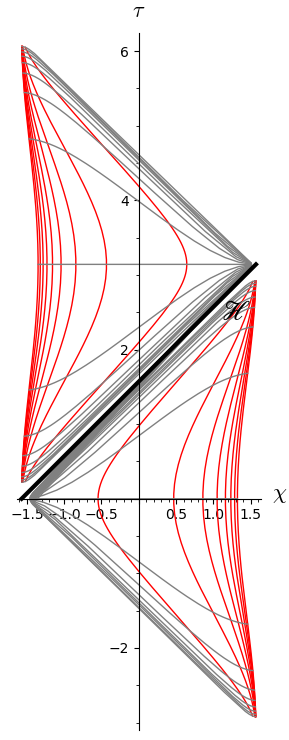

In [74]:
graph_NH = NH.plot(chart=GNH, ambient_coords=(ch, ta), fixed_coords={th: pi/2, ph: 0},
                   ranges={T: (-9, 9), R: (-9, 8)}, color={T: 'red', R: 'grey'},
                   number_values=17, plot_points=200) \
            + line([(-pi/2, 0), (pi/2, pi)], color='black', thickness=3) \
            + text(r"$\mathscr{H}$", (1.3, 2.5), color='black', fontsize=20)
show(graph_NH, aspect_ratio=1, figsize=10) 

The expression of $h$ in terms of the global conformal coordinates is 

In [75]:
h.display(GNH)

h = -m^2/cos(ch)^2 dta⊗dta + (m^2*cos(ta)^2*sin(ch)^2 - m^2*cos(ch)^2*sin(ta)^2 + 2*m^2*cos(ta)*sin(ch) + m^2)/(cos(ch)^2*cos(ta)^2 + 2*cos(ch)^2*cos(ta)*sin(ch) + cos(ch)^2*sin(ch)^2) dch⊗dch + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

The component $h_{\chi\chi}$ looks complicated, but that's only because it suffers from a lack of simplification. 
We may simplify it by enforcing the identities $\sin^2\chi = 1 - \cos^2\chi$ and $\sin^2\tau = 1 - \cos^2\tau$: 

In [76]:
h11 = h[GNH.frame(), 1, 1, GNH].expr()
h11

(m^2*cos(ta)^2*sin(ch)^2 - m^2*cos(ch)^2*sin(ta)^2 + 2*m^2*cos(ta)*sin(ch) + m^2)/(cos(ch)^2*cos(ta)^2 + 2*cos(ch)^2*cos(ta)*sin(ch) + cos(ch)^2*sin(ch)^2)

In [77]:
h11s = h11.subs({sin(ch)^2: 1 - cos(ch)^2, sin(ta)^2: 1 - cos(ta)^2}).simplify_full()
h11s

m^2/cos(ch)^2

An alternative method is to rely on SymPy for trigonometric simplifications:

In [78]:
h11s = h11._sympy_().trigsimp()._sage_()
h11s

m^2/cos(ch)^2

We therefore set

In [79]:
h.add_comp(GNH.frame())[1, 1, GNH] = h11s

and get a far nicer form:

In [80]:
h.display(GNH)

h = -m^2/cos(ch)^2 dta⊗dta + m^2/cos(ch)^2 dch⊗dch + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

The components of $h$ are singular only at the $\mathrm{AdS}_2$ boundaries $\chi = \pm\pi/2$, which are not part of the spacetime $\mathcal{M}$. In particular, they are regular on the event horizon $R=0 \iff \tau = \chi + \frac{\pi}{2}$.

## Couch-Torrence inversion $\Phi$

The Couch-Torrence inversion is the map

In [81]:
Phi = M.diffeomorphism(M, {(BL, BL): (t, m^2/(r - m) + m, th, ph)}, 
                       name='Phi', latex_name=r'\Phi')
Phi.display(BL, BL)

Phi: M → M
   (t, r, th, ph) ↦ (t, m - m^2/(m - r), th, ph)

In [82]:
Phi_r(r) = Phi.expr(BL, BL)[1]
Phi_r

r |--> m - m^2/(m - r)

The Couch-Torrence inversion takes a simple form in terms of the tortoise coordinate $r_*$:

In [83]:
(rstar(Phi_r(r)) + rstar(r)).simplify_log()

0

Hence we conclude that in terms of $r_*$, $\Phi$ is simply $r_* \mapsto - r_*$.

The inverse of $\Phi$ is 

In [84]:
Phi.inverse().display(BL, BL)

Phi^(-1): M → M
   (t, r, th, ph) ↦ (t, -m*r/(m - r), th, ph)

$\Phi$ is an involution:

In [85]:
Phi.inverse() == Phi

True

The expression of $\Phi$ in terms of Eddington-Finkelstein coordinates:

In [86]:
Phi.display(EF, EF)

Phi: M → M
   (v, r, th, ph) ↦ ((4*m^2*log(m) - 4*(m*log(m) + m)*r + 2*r^2 + (m - r)*v - 4*(m^2 - m*r)*log(abs(-m + r)))/(m - r), -m*r/(m - r), th, ph)

The expression of $\Phi$ in terms of near-horizon coordinates is particular simple and, up to a factor $\epsilon^2$, amounts to an inversion in $R$:

In [87]:
Phi.display(NH, NH)

Phi: M → M
   (T, R, th, ph) ↦ (T, 1/(R*eps^2), th, ph)

### The Couch-Torrence inversion as a conformal isometry of $g$

The pullback of $g$ by $\Phi$ is

In [88]:
Pg = Phi.pullback(g)
Pg.display(BL)

Phi^*(g) = -m^2/r^2 dt⊗dt + m^2*r^2/(m^4 - 4*m^3*r + 6*m^2*r^2 - 4*m*r^3 + r^4) dr⊗dr + m^2*r^2/(m^2 - 2*m*r + r^2) dth⊗dth + m^2*r^2*sin(th)^2/(m^2 - 2*m*r + r^2) dph⊗dph

In [89]:
Pg.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
Pg.display(BL)

Phi^*(g) = -m^2/r^2 dt⊗dt + m^2*r^2/(m - r)^4 dr⊗dr + m^2*r^2/(m - r)^2 dth⊗dth + m^2*r^2*sin(th)^2/(m - r)^2 dph⊗dph

In [90]:
Pg == m^2/(r - m)^2 * g

True

Hence we conclude that
$$\Phi^* g = \frac{m^2}{(r - m)^2} g$$
In other words, $\Phi^*$ is a conformal isometry of $g$, with conformal factor $\Omega = \frac{m}{|r - m|}$.

### Action of $\Phi$ on $h$:

In [91]:
Ph = Phi.pullback(h)

In [92]:
Ph.display()

Phi^*(h) = -m^2/(R^2*eps^4) dT⊗dT + m^2/R^2 dR⊗dR + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

As for $h$, the expression of $\Phi^* h$ in Boyer-Lindquist coordinates is independent of $\epsilon$:

In [93]:
Ph.display(BL)

Phi^*(h) = -m^2/(m^2 - 2*m*r + r^2) dt⊗dt + m^2/(m^2 - 2*m*r + r^2) dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

In [94]:
Ph.apply_map(factor, frame=BL.frame(), chart=BL, keep_other_components=True)
Ph.display(BL)

Phi^*(h) = -m^2/(m - r)^2 dt⊗dt + m^2/(m - r)^2 dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

For reference:

In [95]:
h.display(BL)

h = -(m - r)^2/m^2 dt⊗dt + m^2/(m - r)^2 dr⊗dr + m^2 dth⊗dth + m^2*sin(th)^2 dph⊗dph

## Push-forwards of the SL(2,R) Killing vectors

A generic point of $\mathcal{M}$:

In [96]:
p = M((T, R, th, ph), chart=NH, name='p')
print(p)

Point p on the 4-dimensional Lorentzian manifold M


In [97]:
NH(p)

(T, R, th, ph)

In [98]:
Pxi1 = Phi.pushforward(xi1)
Pxi1.at(Phi(p)).display()

Phi_*(xi1) = ∂/∂T

In [99]:
Pxi2 = Phi.pushforward(xi2)
Pxi2.at(Phi(p)).display()

Phi_*(xi2) = T ∂/∂T + R ∂/∂R

In [100]:
Pxi3 = Phi.pushforward(xi3)
Pxi3.at(Phi(p)).display()

Phi_*(xi3) = (1/2*R^2*eps^4 + 1/2*T^2) ∂/∂T + R*T ∂/∂R